## Módulo 5- Ejemplos geográficos específicos

Ya hemos mencionado que Python es un lenguaje de propósito general por lo que a continuación veremos aplicaciones específicas aplicadas en geogradía


Comenzamos instalando las librerías de prueba:

In [ ]:
#!pip install geopandas
#!pip install geodatasets
#!pip install cartopy
#!pip install folium
#!pip install GEEMap

## Geopandas

GeoPandas es una librería de Python que facilita el trabajo con datos geoespaciales, ampliando las funcionalidades de la librería Pandas. Permite leer, escribir, visualizar, analizar y transformar datos espaciales, como shapefiles y bases de datos PostGIS, utilizando una estructura de datos GeoDataFrame que combina información geométrica y no geométrica.

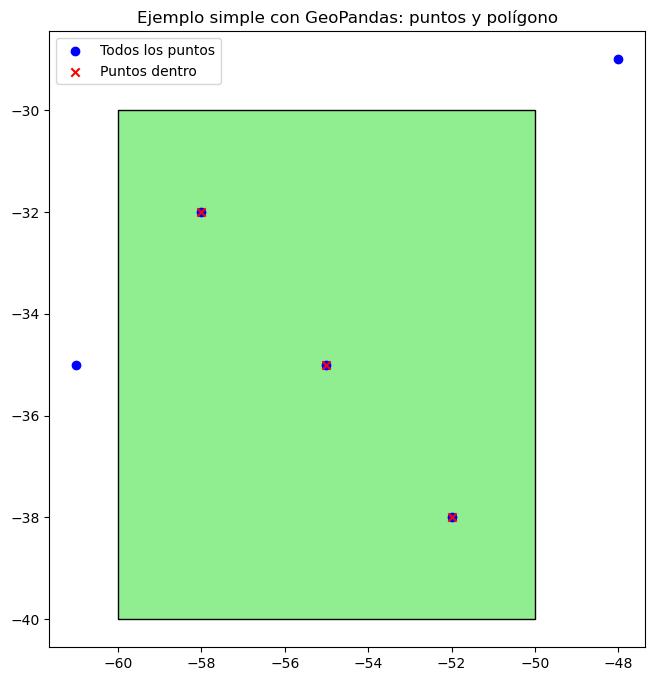

In [15]:
import geopandas as gpd
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt

# 1. Crear un polígono manualmente (simula una región)
# Un cuadrado sencillo: (longitud, latitud)
polygon = Polygon([
    (-60, -30), 
    (-60, -40), 
    (-50, -40), 
    (-50, -30), 
    (-60, -30)
])

# Crear GeoDataFrame con ese polígono
region = gpd.GeoDataFrame({'nombre': ['Region ficticia']}, geometry=[polygon], crs="EPSG:4326")

# 2. Crear algunos puntos arbitrarios
coords = [
    (-55, -35),  # dentro del polígono
    (-58, -32),  # dentro
    (-61, -35),  # fuera
    (-52, -38),  # dentro
    (-48, -29)   # fuera
]
points = gpd.GeoDataFrame(geometry=[Point(xy) for xy in coords], crs="EPSG:4326")

# 3. Selección espacial: qué puntos caen dentro del polígono
puntos_dentro = points[points.within(region.geometry.iloc[0])]

# 4. Visualización
fig, ax = plt.subplots(figsize=(8, 8))
region.plot(ax=ax, color='lightgreen', edgecolor='black')
points.plot(ax=ax, color='blue', marker='o', label='Todos los puntos')
puntos_dentro.plot(ax=ax, color='red', marker='x', label='Puntos dentro')
plt.legend()
plt.title('Ejemplo simple con GeoPandas: puntos y polígono')
plt.show()

# 5. Exportar resultado a archivo GeoJSON
puntos_dentro.to_file("puntos_dentro.geojson", driver='GeoJSON')




## Cartopy

Cartopy es una librería de Python para geografía y mapas. Se usa sobre todo en ciencia, meteorología, geofísica y visualización de datos geoespaciales.

C:\Users\Jorge\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\Jorge\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\Jorge\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\Jorge\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarn

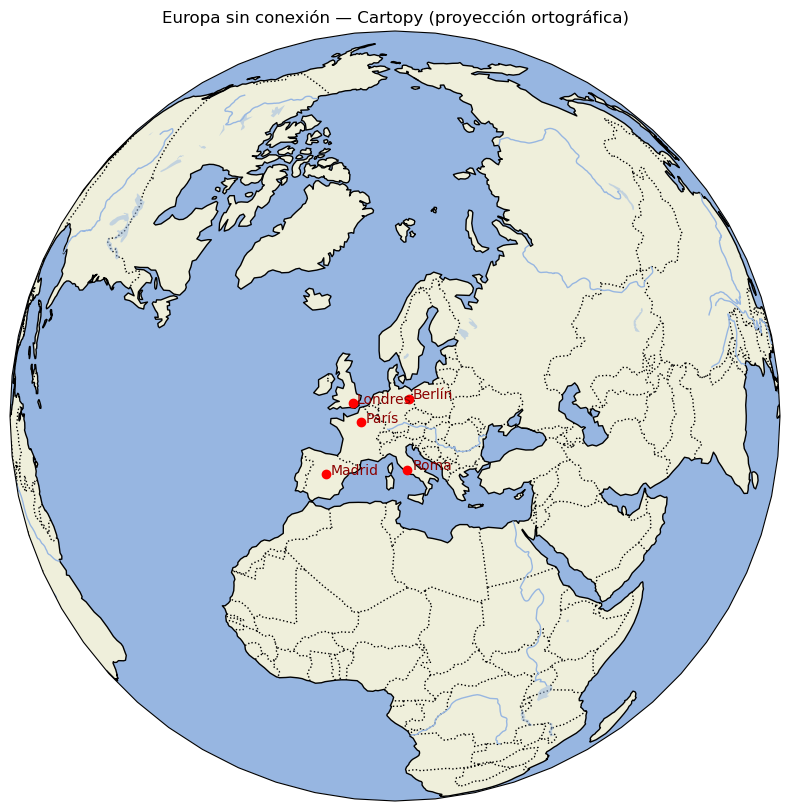

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(12, 10))
proj = ccrs.Orthographic(central_longitude=10, central_latitude=50)
ax = plt.axes(projection=proj)

ax.set_global()

# Añadir capas vectoriales que no dependen de internet
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Agregar algunas ciudades (sin fondo)
ciudades = {
    "Madrid": (-3.7038, 40.4168),
    "París": (2.3522, 48.8566),
    "Roma": (12.4964, 41.9028),
    "Berlín": (13.4050, 52.5200),
    "Londres": (-0.1276, 51.5074)
}

for nombre, (lon, lat) in ciudades.items():
    ax.plot(lon, lat, marker='o', color='red', transform=ccrs.PlateCarree())
    ax.text(lon + 1, lat, nombre, transform=ccrs.PlateCarree(),
            fontsize=10, color='darkred')

plt.title("Europa sin conexión — Cartopy (proyección ortográfica)")
plt.show()




C:\Users\Jorge\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\Jorge\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\Jorge\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\Jorge\AppData\Roaming\Python\Python312\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}

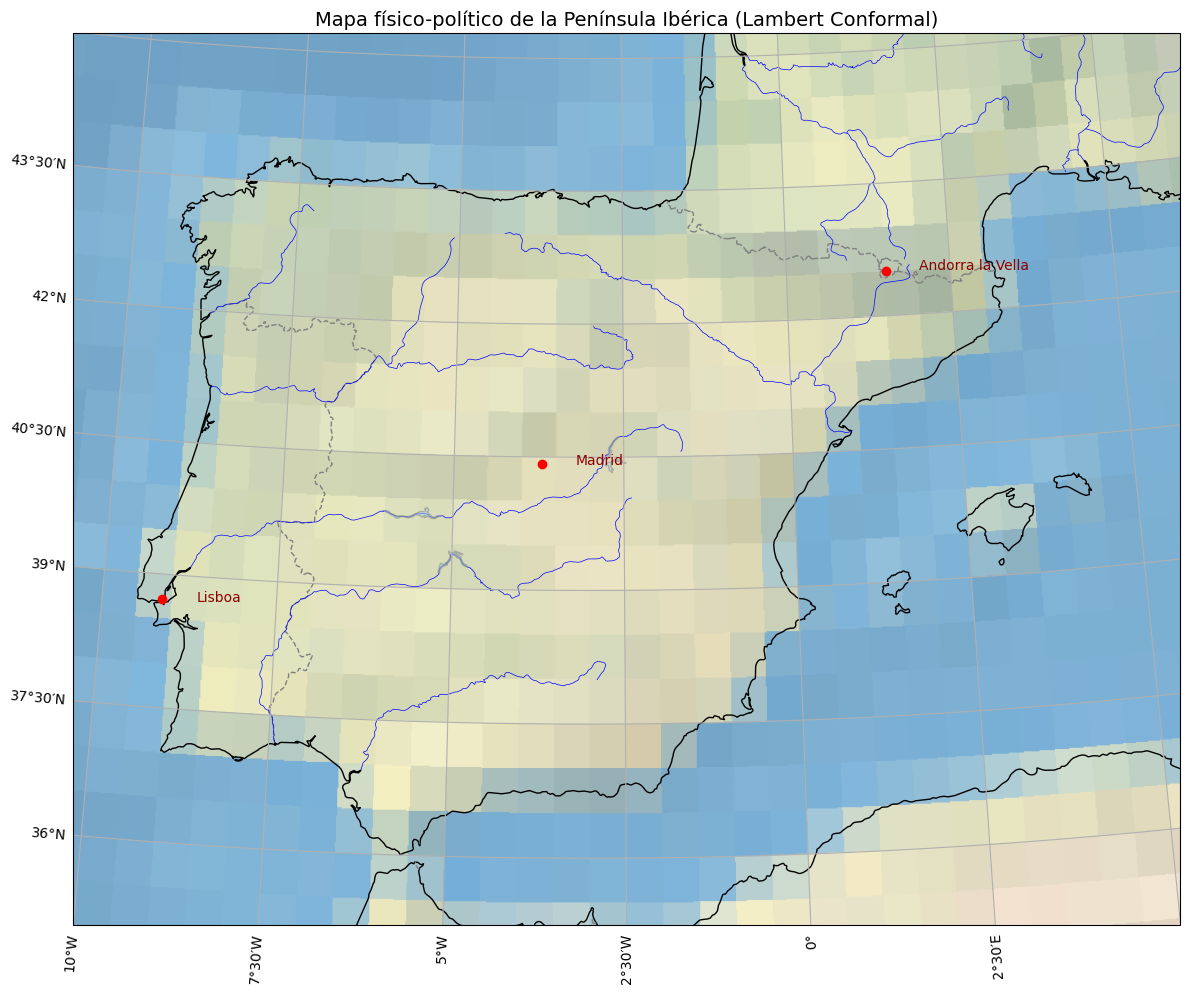

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Crear figura y proyección
fig = plt.figure(figsize=(12, 10))
proj = ccrs.LambertConformal(central_longitude=-3, central_latitude=40, standard_parallels=(30, 60))
ax = plt.axes(projection=proj)

# Extensión sobre la Península Ibérica
ax.set_extent([-10, 5, 35, 45], crs=ccrs.PlateCarree())

# Añadir imagen de fondo simple (incluye topografía)
ax.stock_img()

# Capas vectoriales
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle='--', edgecolor='gray')
ax.add_feature(cfeature.RIVERS.with_scale('10m'), linewidth=0.5, edgecolor='blue')
ax.add_feature(cfeature.LAKES.with_scale('10m'), edgecolor='gray', facecolor='lightblue', alpha=0.5)

# Añadir algunas capitales
ciudades = {
    "Madrid": (-3.7038, 40.4168),
    "Lisboa": (-9.1393, 38.7223),
    "Andorra la Vella": (1.5211, 42.5078)
}
for nombre, (lon, lat) in ciudades.items():
    ax.plot(lon, lat, 'ro', transform=ccrs.PlateCarree())
    ax.text(lon + 0.5, lat, nombre, transform=ccrs.PlateCarree(), fontsize=10, color='darkred')

# Grilla geográfica
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

plt.title("Mapa físico-político de la Península Ibérica (Lambert Conformal)", fontsize=14)
plt.tight_layout()
plt.show()


## Folium

Folium es una de las tantas bibliotecas open source complementarias de Python que permite expandir sus funcionalidades. Folium es una poderosa herramienta de visualización ya que esta biblioteca permite la concepción de mapas interactivos.

In [18]:
import folium

# Crear un mapa centrado en Latinoamérica
m = folium.Map(location=[-33.45, -70.66], zoom_start=5)

# Agregar un marcador
folium.Marker(location=[-33.45, -70.66], popup="Santiago").add_to(m)

# Mostrar el mapa
m

In [6]:
import folium
from folium import plugins
import random
import pandas as pd

# Crear mapa base con múltiples capas base
m = folium.Map(location=[-33.45, -70.66], zoom_start=6, control_scale=True, tiles=None)

# Añadir capas base
folium.TileLayer('OpenStreetMap', name='OSM').add_to(m)
folium.TileLayer('Stamen Terrain', name='Terrain').add_to(m)
folium.TileLayer('CartoDB positron', name='Light').add_to(m)

# 1. Marcadores personalizados
folium.Marker(
    [-33.45, -70.66],
    popup="Santiago",
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)

folium.Marker(
    [-33.04, -71.61],
    popup="Valparaíso",
    icon=folium.Icon(color='blue', icon='cloud')
).add_to(m)

# 2. Círculo en torno a Santiago
folium.Circle(
    location=[-33.45, -70.66],
    radius=70000,
    color='crimson',
    fill=True,
    fill_color='crimson',
    fill_opacity=0.3,
    popup='Área de influencia de Santiago (~70km)'
).add_to(m)

# Introducimos los datos de la población
df = pd.read_csv('data/worldcities.csv',header=0,delimiter=',')

df = df.dropna(subset=['lat', 'lng', 'population'])

#heat_data = [[-33.45 + random.uniform(-0.3, 0.3), -70.66 + random.uniform(-0.3, 0.3)] for _ in range(100)]
#heatmap = plugins.HeatMap(heat_data, radius=15, blur=10)
#heatmap.add_to(folium.FeatureGroup(name="Heatmap").add_to(m))

heat_data = [[row['lat'], row['lng'], row['population']] for index, row in df.iterrows()]

# Crear y añadir el heatmap ponderado por población
heatmap = plugins.HeatMap(heat_data, radius=15, blur=10, max_zoom=6)
heatmap.add_to(folium.FeatureGroup(name="Heatmap").add_to(m))

# 4. Polígono de ejemplo (GeoJSON directo)
polygon = {
    "type": "Feature",
    "geometry": {
        "type": "Polygon",
        "coordinates": [[
            [-70.9, -33.7],
            [-70.4, -33.7],
            [-70.4, -33.2],
            [-70.9, -33.2],
            [-70.9, -33.7]
        ]]
    },
    "properties": {"name": "Zona Urbana"}
}

folium.GeoJson(
    polygon,
    name="Zona Urbana",
    style_function=lambda feature: {
        "fillColor": "green",
        "color": "green",
        "weight": 2,
        "fillOpacity": 0.2
    },
    tooltip=folium.GeoJsonTooltip(fields=["name"])
).add_to(m)

# 5. MiniMapa y control de capas
plugins.MiniMap(toggle_display=True).add_to(m)
folium.LayerControl(collapsed=False).add_to(m)

# Mostrar el mapa
m



## Geemap

GEEMAP es una biblioteca de Python de código abierto que proporciona una interfaz interactiva para trabajar con Google Earth Engine (GEE), usando mapas en entornos como Jupyter Notebook o Google Colab

In [41]:
import geemap
import ee

# Inicializa Earth Engine
ee.Initialize()

# Crear el mapa interactivo
Map = geemap.Map(center=[36.5, 33.5], zoom=8)

# 1. Colección a partir de una string (filtrando y limitando)
collection_str = ee.ImageCollection('COPERNICUS/S2_SR') \
    .filterDate('2017-03-01', '2017-03-31') \
    .filterBounds(ee.Geometry.Point(36.5, 33.5)) \
    .limit(3)

# 2. Colección a partir de una lista de imágenes
img1 = ee.Image('COPERNICUS/S2_SR/20170328T083601_20170328T084228_T35RNK')
img2 = ee.Image('COPERNICUS/S2_SR/20170328T083601_20170328T084228_T35RNL')
img3 = ee.Image('COPERNICUS/S2_SR/20170328T083601_20170328T084228_T35RNM')

collection_list = ee.ImageCollection([img1, img2, img3])

# 3. Colección a partir de una sola imagen
collection_single = ee.ImageCollection(img1)

# Visualización de una imagen
vis_params = {
    'bands': ['B4', 'B3', 'B2'],  # Rojo, Verde, Azul
    'min': 0,
    'max': 3000
}

Map.addLayer(img1, vis_params, 'Sentinel-2 RGB (T35RNK)')

# Mapa más o menos sur de turquía, oeste de Siria, Norte del Líbano
Map.to_html("map.html")


## Recursos adicionales:

- Curso de python para análisis espacial: https://courses.spatialthoughts.com/python-foundation.html#calculating-distance-1
- Introducción a python para análisis de datos geográfico https://pythongis.org/
- 5 paquetes de python para análisis geoespacial https://www.kdnuggets.com/2023/08/5-python-packages-geospatial-data-analysis.html
- Google earth engine https://earthengine.google.com/
- Folium: https://datascientest.com/es/folium-descubra-la-biblioteca-de-python-open-source#:~:text=Folium%20es%20una%20de%20las,la%20concepci%C3%B3n%20de%20mapas%20interactivos.
- 